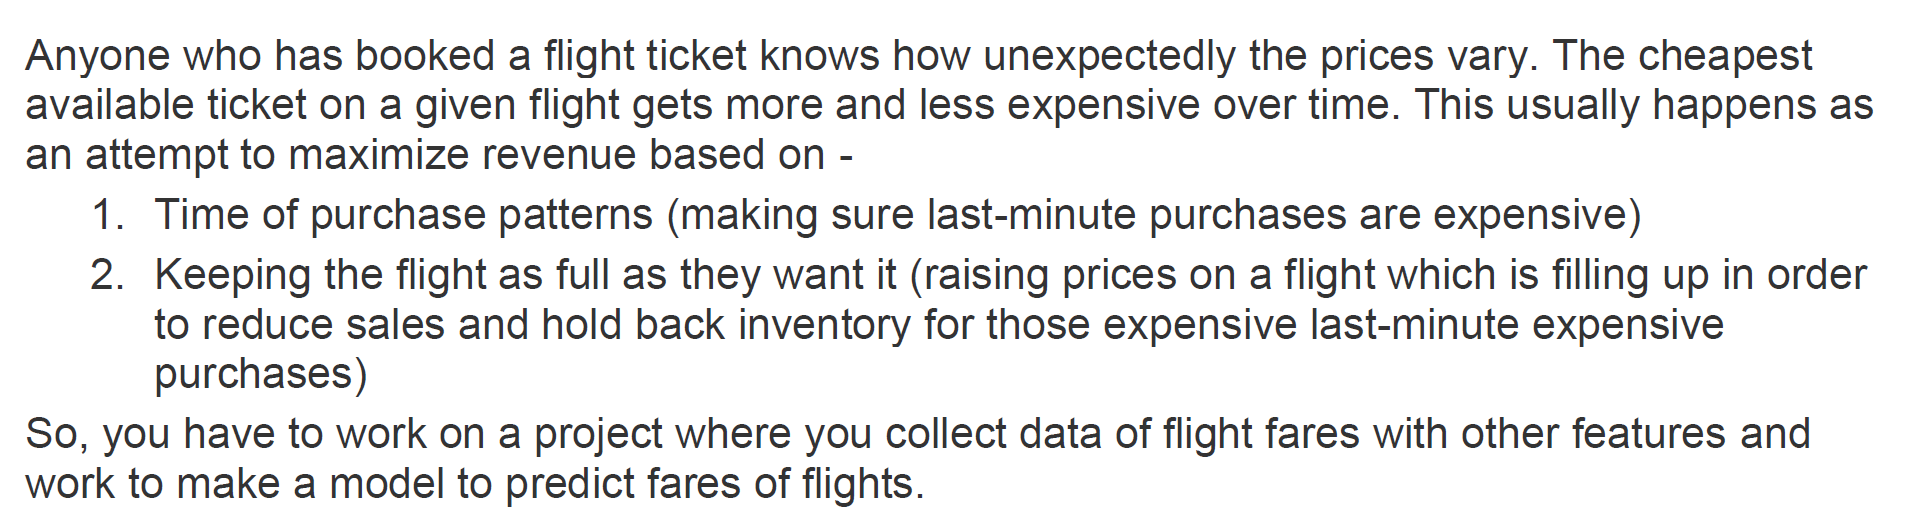

In [1]:
# importing requried libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel("Combined.xlsx")
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

In [3]:
df.head()

,Unnamed: 0,Date,Airline Name,Departure,Source,Duration,Stop,Destination,Arrival,Price
0,0,2022-07-17,IndiGo,08:40:00,Chennai,01 h,Non stop,Coimbatore,09:40:00,"â‚¹ 3,523"
1,1,2022-07-17,IndiGo,09:45:00,Chennai,01 h 10 m,Non stop,Coimbatore,10:55:00,"â‚¹ 3,523"
2,2,2022-07-17,Air India,13:30:00,Chennai,01 h 05 m,Non stop,Coimbatore,14:35:00,"â‚¹ 3,523"
3,3,2022-07-17,IndiGo,14:35:00,Chennai,01 h,Non stop,Coimbatore,15:35:00,"â‚¹ 3,523"
4,4,2022-07-17,IndiGo,16:15:00,Chennai,01 h,Non stop,Coimbatore,17:15:00,"â‚¹ 3,523"


In [4]:
df.tail()

,Unnamed: 0,Date,Airline Name,Departure,Source,Duration,Stop,Destination,Arrival,Price
9905,4325,2023-02-26,IndiGo,06:25:00,Chennai,04 h 50 m,1 stop via Madurai,Mumbai,11:15:00,"â‚¹ 11,661"
9906,4326,2023-02-26,Go First,05:00:00,Chennai,01 h 50 m,Non stop,Mumbai,06:50:00,"â‚¹ 12,236"
9907,4327,2023-02-26,Go First,13:45:00,Chennai,01 h 55 m,Non stop,Mumbai,15:40:00,"â‚¹ 12,236"
9908,4328,2023-02-26,Go First,15:15:00,Chennai,06 h 10 m,1 stop via Ahmedabad,Mumbai,21:25:00,"â‚¹ 19,245"
9909,4329,2023-02-26,Go First,15:15:00,Chennai,10 h 45 m,1 stop via Ahmedabad,Mumbai,02:00:00,"â‚¹ 19,245"


In [7]:
df.shape

(9910, 10)

In [8]:
df.columns

Index(['Unnamed: 0', 'Date', 'Airline Name', 'Departure', 'Source', 'Duration',
       'Stop', 'Destination', 'Arrival', 'Price'],
      dtype='object')

# Observation

this dataset has 9910 rows and 10 columns

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9910 entries, 0 to 9909
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    9910 non-null   int64         
 1   Date          9910 non-null   datetime64[ns]
 2   Airline Name  9910 non-null   object        
 3   Departure     9910 non-null   object        
 4   Source        9910 non-null   object        
 5   Duration      9910 non-null   object        
 6   Stop          9910 non-null   object        
 7   Destination   9910 non-null   object        
 8   Arrival       9910 non-null   object        
 9   Price         9910 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 774.3+ KB


# Observation

We have Object and Integer data

In [10]:
df.describe()

,Unnamed: 0
count,9910.000000
mean,2170.450454
std,1389.714902
min,0.000000
25%,887.000000
50%,2125.500000
75%,3364.000000
max,4876.000000


In [11]:
df.nunique()

Unnamed: 0      4877
Date             226
Airline Name       8
Departure        103
Source             1
Duration          80
Stop              25
Destination        3
Arrival          119
Price            260
dtype: int64

In [100]:
df["Destination"].unique()

array(['Coimbatore', 'New Delhi', 'Mumbai'], dtype=object)

In [101]:
df["Source"].unique()

array(['Chennai'], dtype=object)

In [102]:
df["Airline Name"].unique()

array(['IndiGo', 'Air India', 'Vistara', 'Go First', 'SpiceJet',
       'AirAsia', 'IndiGo, Go First', 'IndiGo, AirAsia'], dtype=object)

# null value check

<AxesSubplot:>

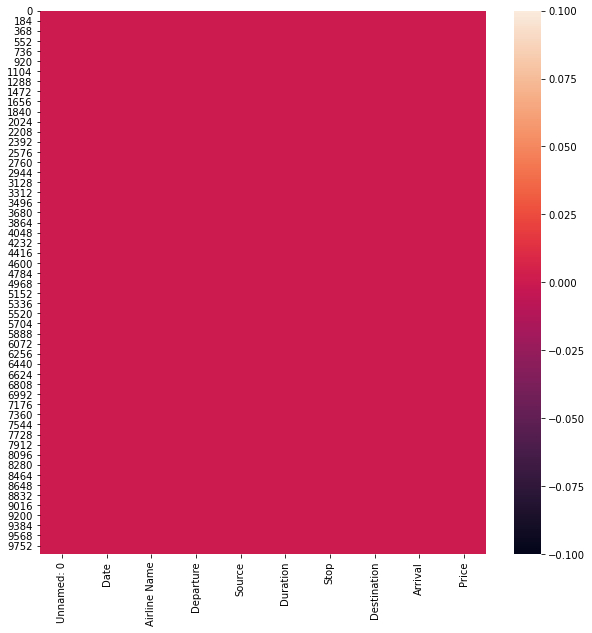

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull())

In [19]:
df.isnull().sum().sort_values(ascending=False)

Unnamed: 0      0
Date            0
Airline Name    0
Departure       0
Source          0
Duration        0
Stop            0
Destination     0
Arrival         0
Price           0
dtype: int64

# observation

there are no null values

# univariate analysis

<AxesSubplot:xlabel='Airline Name', ylabel='count'>

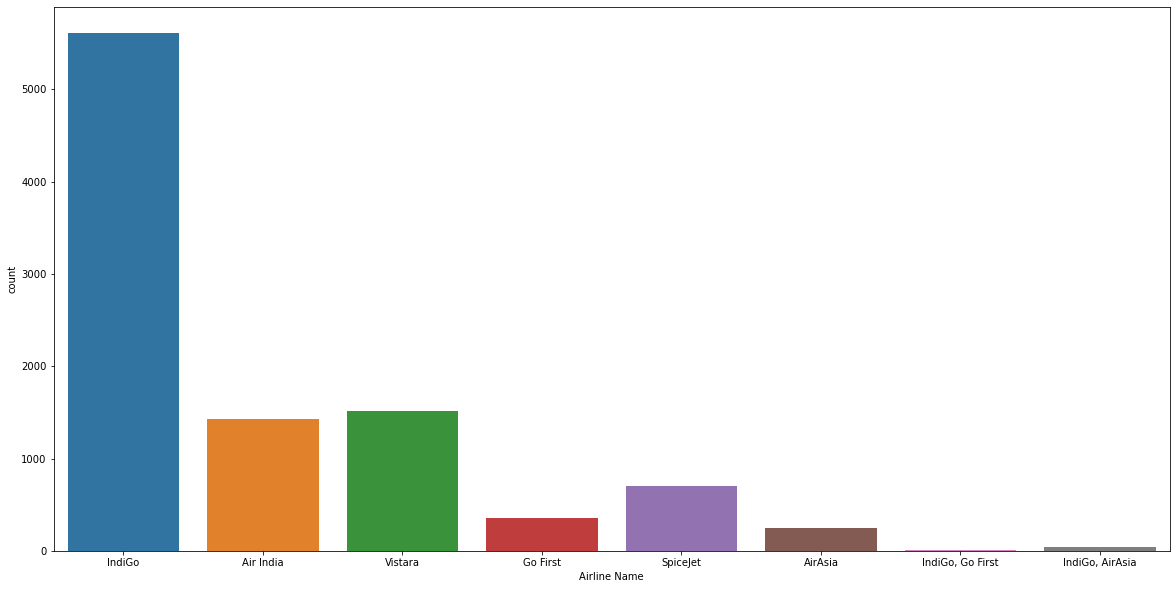

In [50]:
plt.figure(figsize=(20,10))
sns.countplot(df['Airline Name'])

# observation

IndiGo Flights count is higher 

<AxesSubplot:xlabel='Source', ylabel='count'>

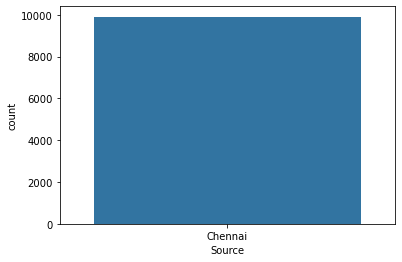

In [51]:
sns.countplot(df['Source'])

# observation

Flights start Delhi

<AxesSubplot:xlabel='Destination', ylabel='count'>

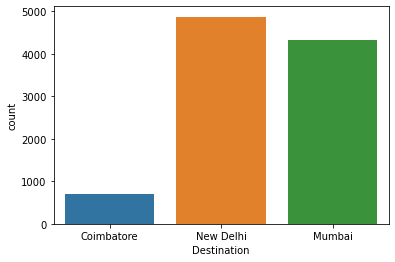

In [52]:
sns.countplot(df['Destination'])

# observation

New Delhi Has higher no of flights compared to other destinations

<AxesSubplot:xlabel='Stop', ylabel='count'>

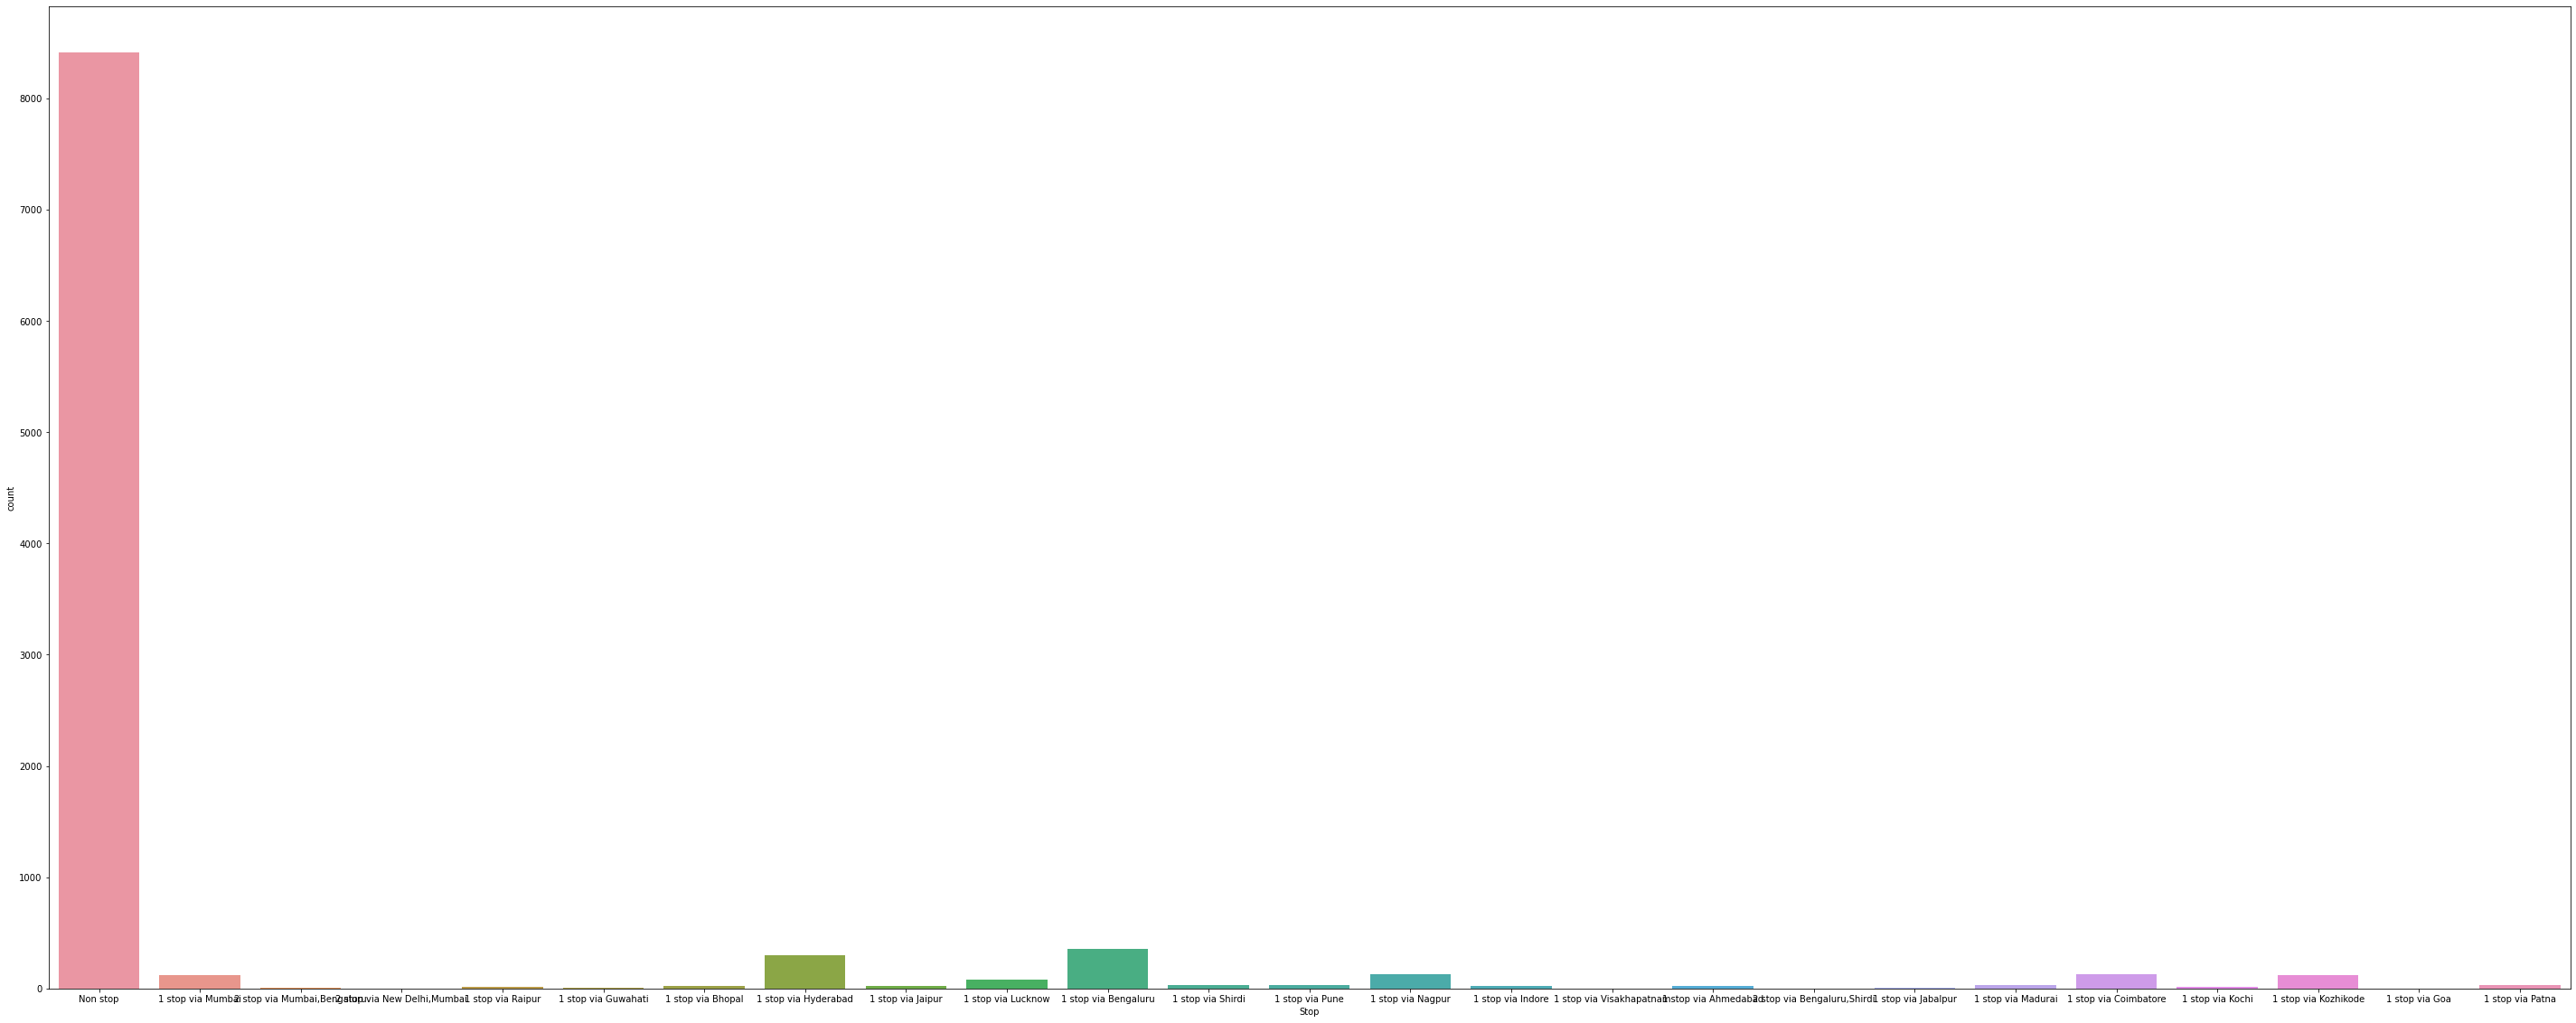

In [90]:
plt.figure(figsize=(50,20))
sns.countplot(df['Stop'])

# observation

non stop are higher compared to others

# Bivariate Analysis

In [6]:
df["Price"]=df["Price"].str.replace("â‚¹","").str.replace(",","").str.strip().astype("int")

<AxesSubplot:xlabel='Airline Name', ylabel='Price'>

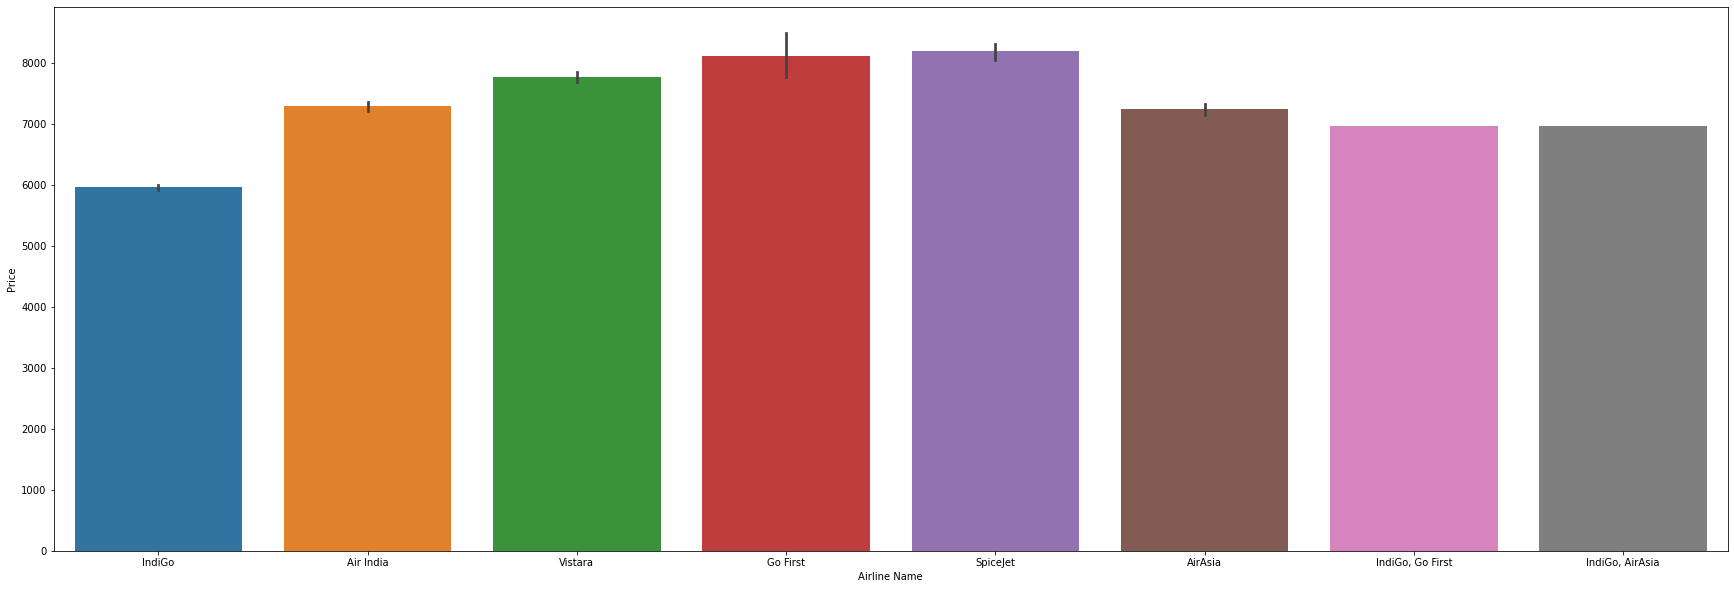

In [61]:
plt.figure(figsize=(30,10))
sns.barplot(df['Airline Name'],df['Price'])

<AxesSubplot:xlabel='Airline Name', ylabel='Price'>

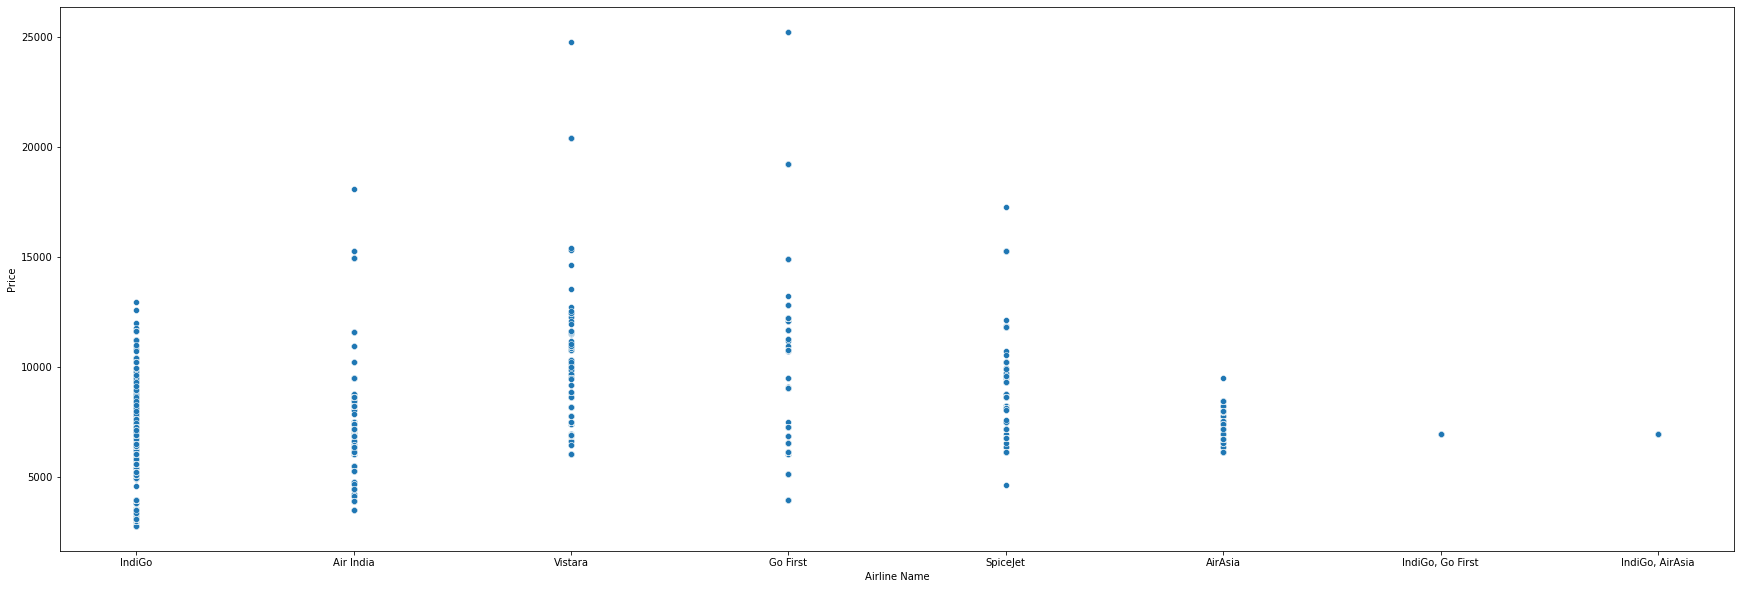

In [62]:
plt.figure(figsize=(30,10))
sns.scatterplot(df['Airline Name'],df['Price'])

# Observation

GoFirst , SpiceJet Price is higher compared to others

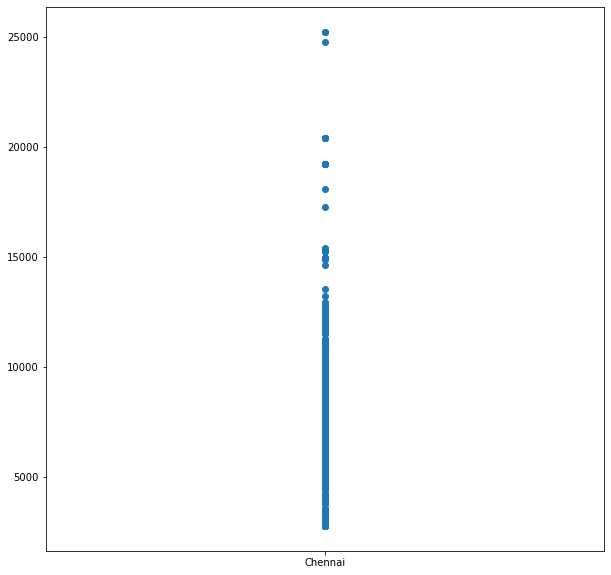

In [63]:
plt.figure(figsize=(10,10))
plt.scatter(df['Source'],df['Price'])

# Observation

Flights Price can go up to 25000 from chennai

<AxesSubplot:xlabel='Stop', ylabel='Price'>

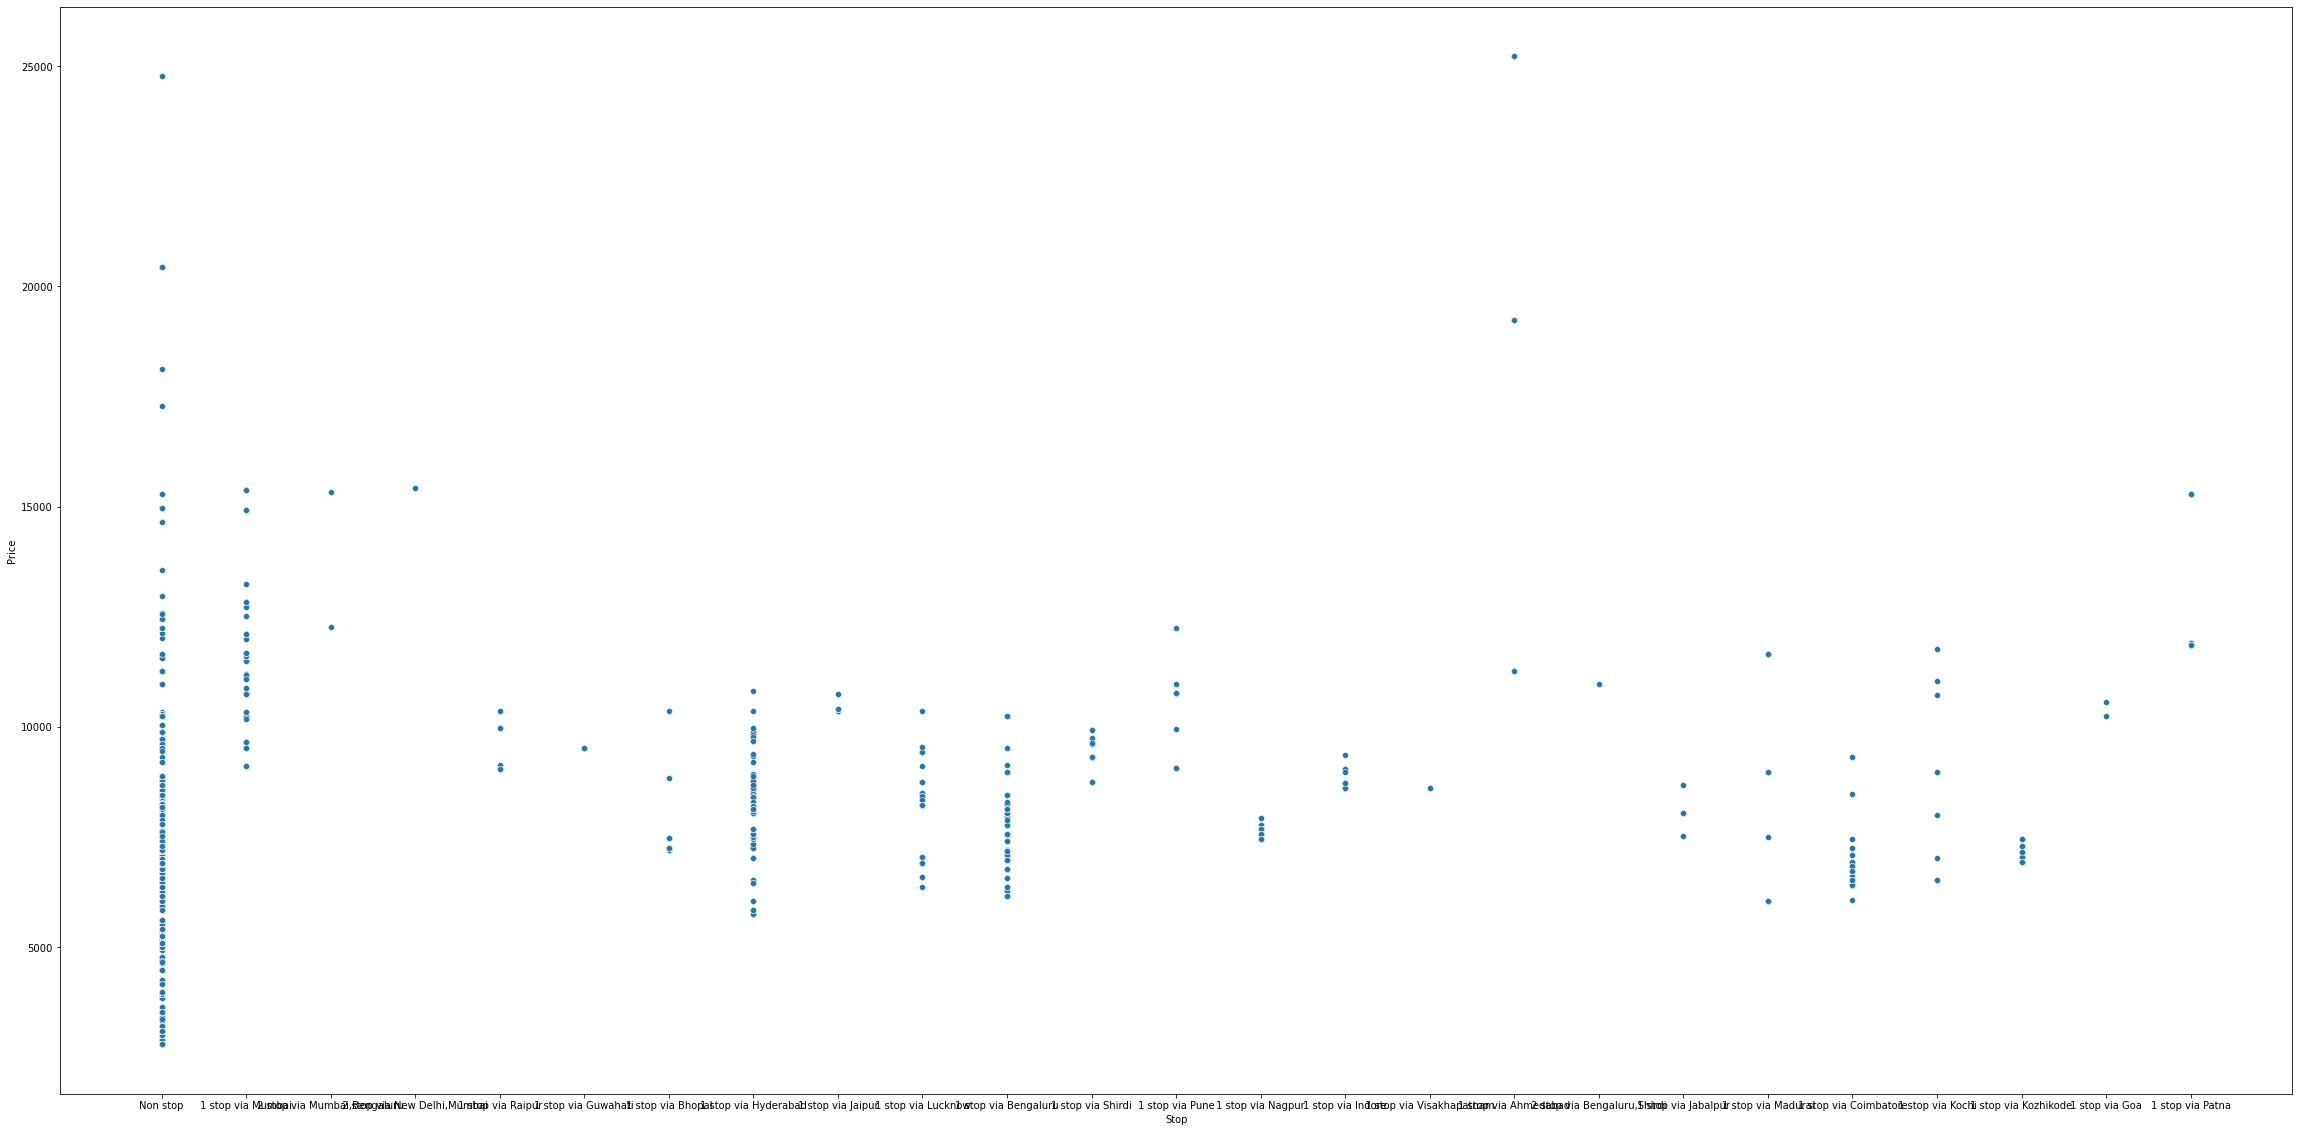

In [94]:
plt.figure(figsize=(40,20))
sns.scatterplot(df['Stop'],df['Price'])

<AxesSubplot:xlabel='Stop', ylabel='Price'>

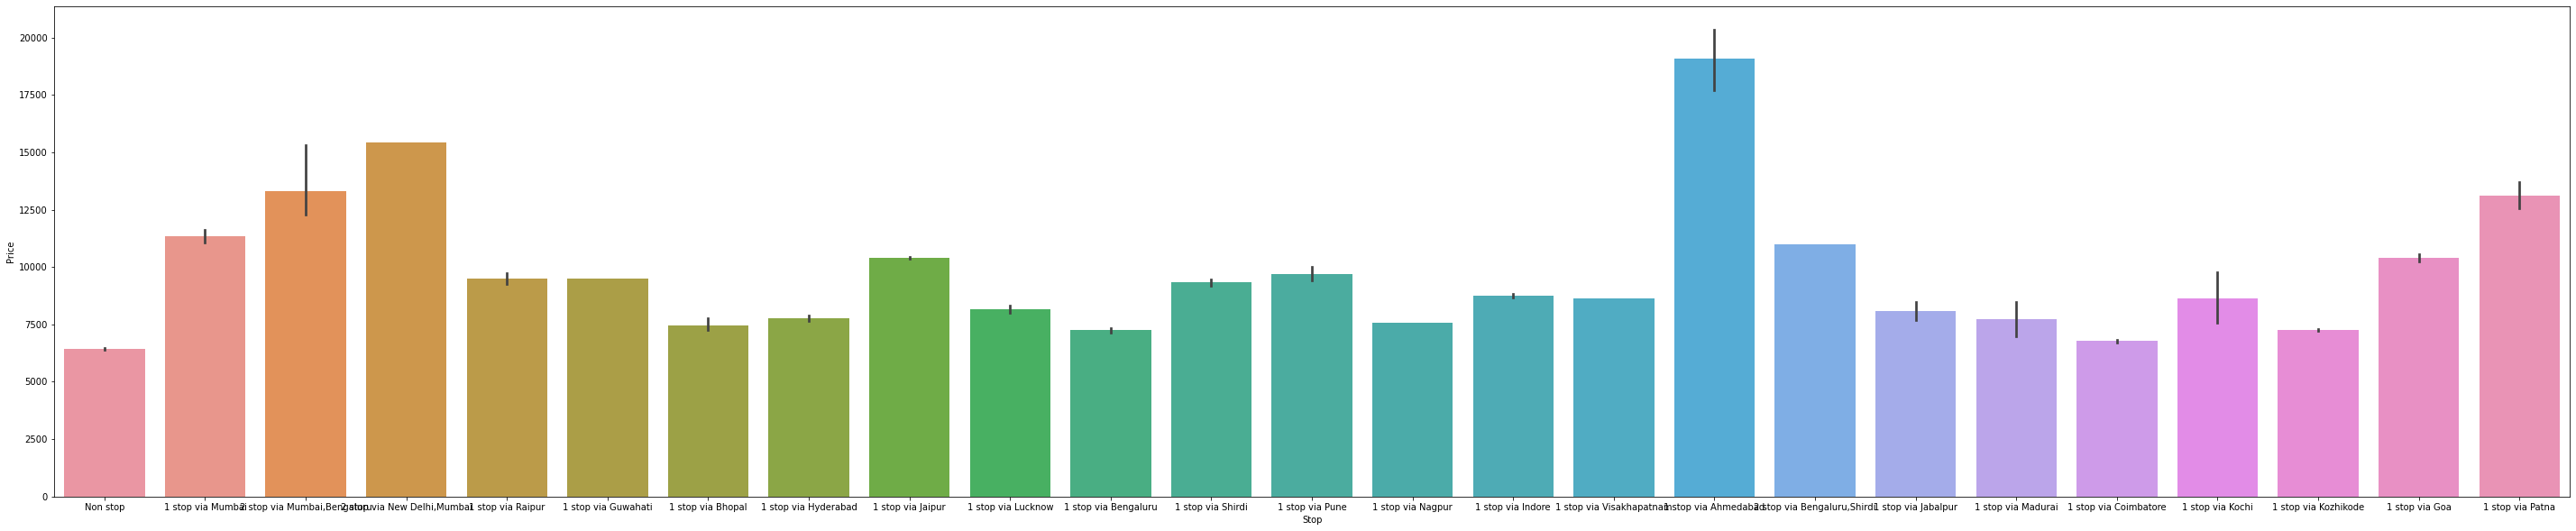

In [68]:
plt.figure(figsize=(50,10))
sns.barplot(df['Stop'],df['Price'])

# observations

No stop pirce is lower compared to all

<AxesSubplot:xlabel='Destination', ylabel='Price'>

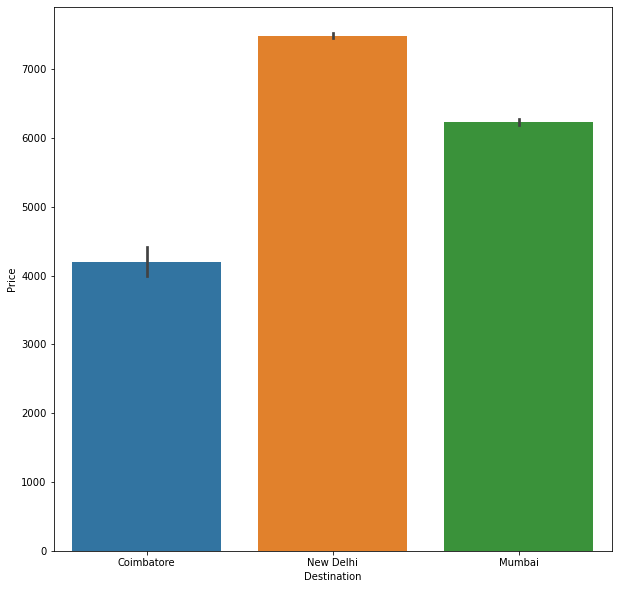

In [69]:
plt.figure(figsize=(10,10))
sns.barplot(df['Destination'],df['Price'])

<AxesSubplot:xlabel='Destination', ylabel='Price'>

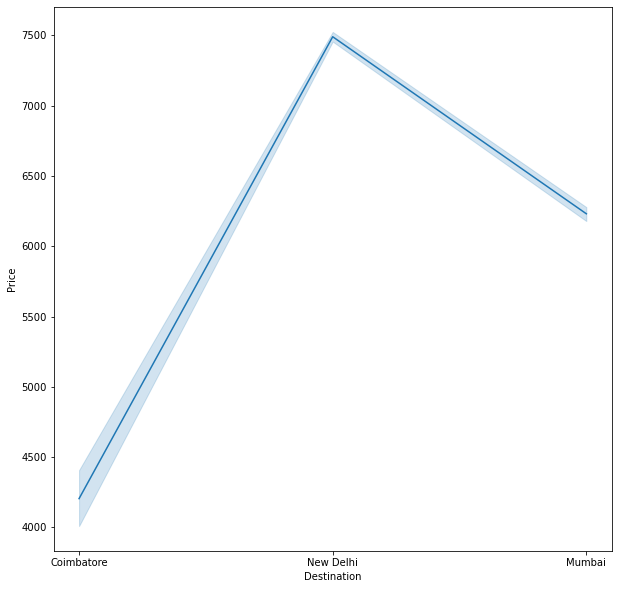

In [70]:
plt.figure(figsize=(10,10))
sns.lineplot(df['Destination'],df['Price'])

# Observation

Flights arrival at New delhi is higher price compared to others

<AxesSubplot:xlabel='Date', ylabel='Price'>

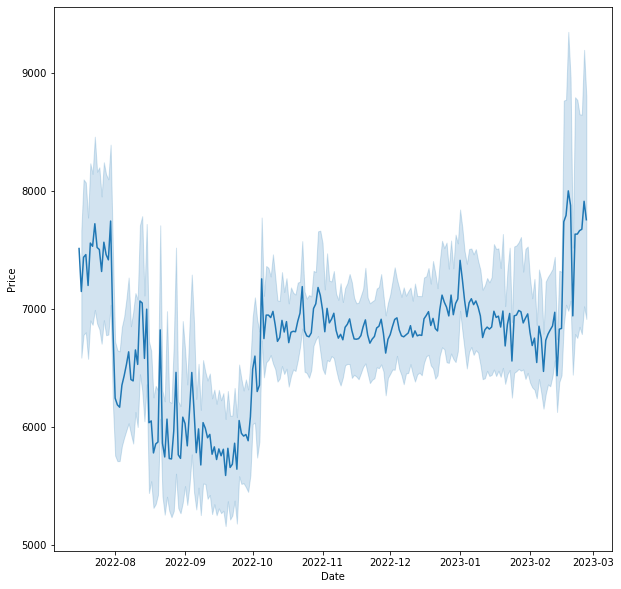

In [98]:
plt.figure(figsize=(10,10))
sns.lineplot(df['Date'],df['Price'])

# Observation

The price of flight is higher when we book at last minute we can see for july and august month price is so high

The price is lower for september and october 

then again for advance booking at very large timeinterval the price is higher 

In [3]:
dft = pd.DataFrame()
dft["time"] = pd.to_datetime(df["Departure"],format="%H:%M:%S").dt.hour
dft["Price"]=df["Price"].str.replace("â‚¹","").str.replace(",","").str.strip().astype("int")

In [4]:
import matplotlib.pyplot as plt

([<matplotlib.axis.XTick at 0x284e69e8220>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

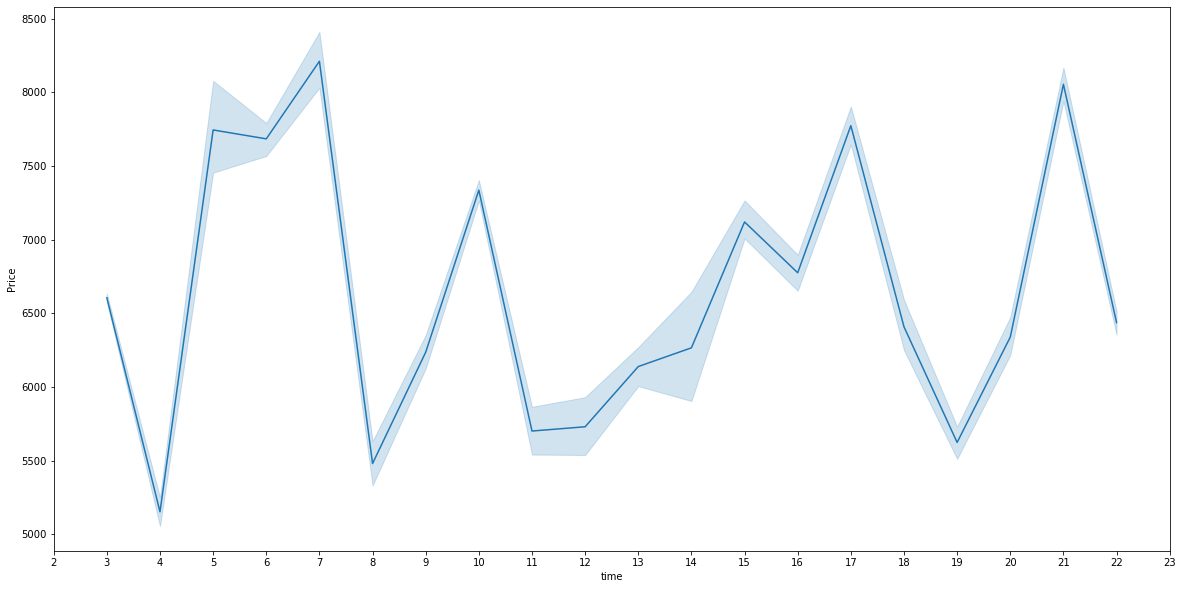

In [6]:
plt.figure(figsize=(20,10))
sns.lineplot(dft["time"],dft["Price"])
plt.xticks(np.arange(2, 24, 1))

([<matplotlib.axis.XTick at 0x284e6ac29a0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

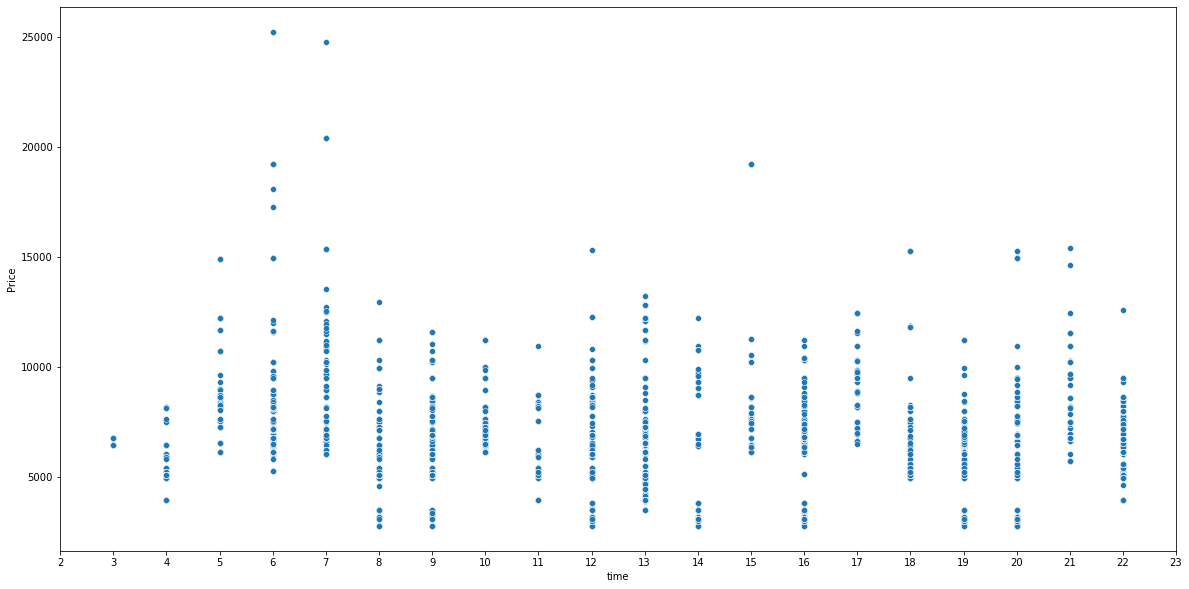

In [7]:
plt.figure(figsize=(20,10))
sns.scatterplot(dft["time"],dft['Price'])
plt.xticks(np.arange(2, 24, 1))

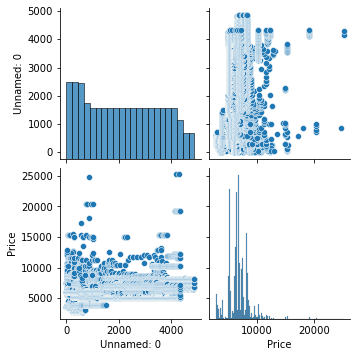

In [72]:
sns.pairplot(df)

# Encoding

In [8]:
df.dtypes

Unnamed: 0               int64
Date            datetime64[ns]
Airline Name            object
Departure               object
Source                  object
Duration                object
Stop                    object
Destination             object
Arrival                 object
Price                   object
dtype: object

# Observation

now i need to encode categorical data

In [4]:
df["Price"]=df["Price"].str.replace("â‚¹","").str.replace(",","").str.strip().astype("int")

# Using pd.get_dummies as data are not ordinal in nature

In [5]:
df.head()

,Unnamed: 0,Date,Airline Name,Departure,Source,Duration,Stop,Destination,Arrival,Price
0,0,2022-07-17,IndiGo,08:40:00,Chennai,01 h,Non stop,Coimbatore,09:40:00,3523
1,1,2022-07-17,IndiGo,09:45:00,Chennai,01 h 10 m,Non stop,Coimbatore,10:55:00,3523
2,2,2022-07-17,Air India,13:30:00,Chennai,01 h 05 m,Non stop,Coimbatore,14:35:00,3523
3,3,2022-07-17,IndiGo,14:35:00,Chennai,01 h,Non stop,Coimbatore,15:35:00,3523
4,4,2022-07-17,IndiGo,16:15:00,Chennai,01 h,Non stop,Coimbatore,17:15:00,3523


In [6]:
a = pd.get_dummies(df["Airline Name"])
b = pd.get_dummies(df["Destination"],prefix="destination")
c = pd.get_dummies(df["Stop"]).astype(int)
d = pd.get_dummies(df["Source"])

In [7]:
from datetime import time

In [8]:
df["Journey_day"] = df["Date"].dt.day

In [9]:
df["Journey_month"] = df["Date"].dt.month

In [10]:
df["Journey_year"] = df["Date"].dt.year

In [11]:
df["Dep_hours"] = pd.to_datetime(df["Departure"],format="%H:%M:%S").dt.hour

In [12]:
df["Dep_minutes"] = pd.to_datetime(df["Departure"],format="%H:%M:%S").dt.minute

In [13]:
df["Arrival_hours"] = pd.to_datetime(df["Arrival"],format="%H:%M:%S").dt.hour

In [14]:
df["Arrival_minutes"] = pd.to_datetime(df["Arrival"],format="%H:%M:%S").dt.minute

# Seperating day month  , hours and minutes

In [15]:
dur = list(df["Duration"])

for i in range(len(dur)):
    if len(dur[i].split()) == 2:   
        if "h" in dur[i]:
            dur[i] = dur[i].strip() + " 0m"  
        else:
            dur[i] = "0h " + dur[i]         



In [16]:
duration_hours = []
duration_mins = []


In [17]:
for i in range(len(dur)):
    duration_hours.append(int(dur[i].split(sep = "h")[0]))  
    duration_mins.append(int(dur[i].split(sep = "m")[0].split()[-1]))   

In [18]:
df["Duration_hours"] = duration_hours
df["Duration_minutes"] = duration_mins

# Observation

In [22]:
df.head()

,Price,Journey_day,Journey_month,Journey_year,Dep_hours,Dep_minutes,Arrival_hours,Arrival_minutes,Duration_hours,Duration_minutes
0,3523,17,7,2022,8,40,9,40,1,0
1,3523,17,7,2022,9,45,10,55,1,10
2,3523,17,7,2022,13,30,14,35,1,5
3,3523,17,7,2022,14,35,15,35,1,0
4,3523,17,7,2022,16,15,17,15,1,0


In [19]:
df.drop(["Date","Departure","Arrival","Duration","Airline Name","Source","Destination","Unnamed: 0","Stop"],inplace=True,axis=1)

In [20]:
# joining dummies to dataframe
df_new=df.join(a).join(b).join(c).join(d)

In [21]:
df_new.dtypes

Price                          int32
Journey_day                    int64
Journey_month                  int64
Journey_year                   int64
Dep_hours                      int64
Dep_minutes                    int64
Arrival_hours                  int64
Arrival_minutes                int64
Duration_hours                 int64
Duration_minutes               int64
Air India                      uint8
AirAsia                        uint8
Go First                       uint8
IndiGo                         uint8
IndiGo, AirAsia                uint8
IndiGo, Go First               uint8
SpiceJet                       uint8
Vistara                        uint8
destination_Coimbatore         uint8
destination_Mumbai             uint8
destination_New Delhi          uint8
1 stop via Ahmedabad           int32
1 stop via Bengaluru           int32
1 stop via Bhopal              int32
1 stop via Coimbatore          int32
1 stop via Goa                 int32
1 stop via Guwahati            int32
1

# Observation

we have succesfully converted all object data to numeric data

# Variance Inflation Factor

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [33]:
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(df_new.values,a) for a in range(46)]
vif["Feature names"] = df_new.columns
vif.sort_values(by="VIF",ascending=False)

,VIF,Feature names
23,inf,1 stop via Coimbatore
33,inf,1 stop via Madurai
25,inf,1 stop via Guwahati
26,inf,1 stop via Hyderabad
27,inf,1 stop via Indore
28,inf,1 stop via Jabalpur
29,inf,1 stop via Jaipur
30,inf,1 stop via Kochi
31,inf,1 stop via Kozhikode
32,inf,1 stop via Lucknow


# Observation

We have mulitcollinearity so i am going to use PCA to Merge all columns to remove Mulitcollinearity

# PCA 

In [22]:
df_new.drop(["Price"],axis=1,inplace=True)

In [23]:
from sklearn.decomposition import PCA
pca = PCA().fit(df_new)

In [24]:
df_new.shape

(9910, 46)

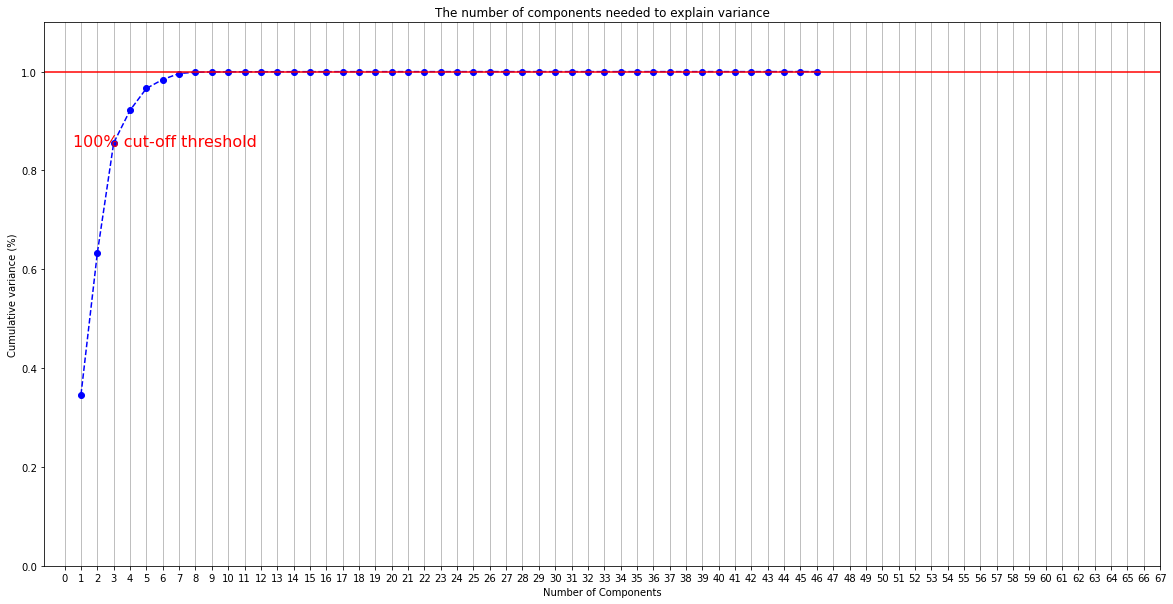

In [25]:
fig, ax = plt.subplots(figsize=(20,10))
xi = np.arange(1, 47, step=1)
yi = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 68, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=1, color='r', linestyle='-')
plt.text(0.5, 0.85, '100% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

# Principal component analysis as no of columns are higher

In [26]:
from sklearn.decomposition import PCA

In [27]:
pca = PCA(n_components=40)
dfi=pca.fit_transform(df_new)

In [28]:
df_new = pd.DataFrame(dfi)

In [29]:
df_new.shape

(9910, 40)

# Multicolinearity Checking

# variance inflation factor

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [31]:
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(df_new.values,a) for a in range(40)]
vif["Feature names"] = df_new.columns
vif.sort_values(by=["VIF"],ascending=False)

,VIF,Feature names
35,1.0,35
38,1.0,38
39,1.0,39
10,1.0,10
22,1.0,22
36,1.0,36
37,1.0,37
24,1.0,24
25,1.0,25
8,1.0,8


# observaiton

No multicolinearity observed as PCA takes care of multicolinearity

In [35]:
x_final = df_new
y = df["Price"]

# model Training starts

# Importing required libraries

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

# i have write a code block that tests data with models and rank them according to cross val score and accuracy score

In [37]:
result = pd.DataFrame(columns=["Model Name","Train Score","Test Score","Cross Val Score"])
ela=[]
lin=[]
dec=[]
rid=[]
las=[]
kne=[]
rfr=[]
ada=[]
licol=[ela,lin,dec,rid,las,kne,rfr,ada]

algo = [ElasticNet(),LinearRegression(),DecisionTreeRegressor(),Ridge(),Lasso(),KNeighborsRegressor(),RandomForestRegressor(),AdaBoostRegressor()]
oo= 0    
for v in algo:
    r = 0
    acc = 0
    for i in range(0,60):
        al = v
        train_x,test_x,train_y,test_y = train_test_split(x_final,y,test_size=.20,random_state=i)
        al.fit(train_x,train_y)
        score = al.score(train_x,train_y)
        if score>acc:
            acc = score
            r = i
            
    print(f'the best random state is {r} for {v}')     
        
 
    train_x,test_x,train_y,test_y = train_test_split(x_final,y,test_size=.20,random_state=r)
    al.fit(train_x,train_y)
    trs = al.score(train_x,train_y)
    tss = al.score(test_x,test_y)
    cvs = cross_val_score(al,x_final,y,cv=KFold(5)).mean()   
    licol[oo].insert(0,v)
    licol[oo].insert(1,trs)
    licol[oo].insert(2,tss)
    licol[oo].insert(3,cvs)
    result.loc[oo] = licol[oo]
    oo+=1

final_result = result.sort_values(by=["Cross Val Score","Test Score"],ascending=False)   

the best random state is 39 for ElasticNet()
the best random state is 39 for LinearRegression()
the best random state is 32 for DecisionTreeRegressor()
the best random state is 39 for Ridge()
the best random state is 39 for Lasso()
the best random state is 44 for KNeighborsRegressor()
the best random state is 44 for RandomForestRegressor()
the best random state is 18 for AdaBoostRegressor()


In [39]:
final_result

,Model Name,Train Score,Test Score,Cross Val Score
4,Lasso(),0.755842,0.658784,2.366388e-01
3,Ridge(),0.759318,0.664432,2.213105e-01
6,"(DecisionTreeRegressor(max_features='auto', ra...",0.985830,0.743175,8.238501e-02
0,ElasticNet(),0.484586,0.410680,6.430430e-02
7,"(DecisionTreeRegressor(max_depth=3, random_sta...",0.148908,-0.015018,-7.531857e-01
5,KNeighborsRegressor(),0.875108,0.711916,-7.889693e-01
2,DecisionTreeRegressor(),0.999915,0.830839,-2.878913e+00
1,LinearRegression(),0.760189,0.660331,-1.573558e+19


In [40]:
final_result.loc[4]["Model Name"]

Lasso()

# running Support vector classifier induvidually as it consumes more memory

In [ ]:
svr = SVR()
train_x,test_x,train_y,test_y = train_test_split(x_final,y,test_size=.20,random_state=39)
svr.fit(train_x,train_y)
trs = al.score(train_x,train_y)
tss = al.score(test_x,test_y)
cvs = cross_val_score(svr,x_final,y,cv=KFold(5)).mean()
print(f'the training score is {trs} the testing score is {tss} the cross val score is {cvs} for {v}') 

# Observation

from all the classifier models Lasso  performed best 

# HyperParameter Tunining

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
ls =Lasso()
train_x,test_x,train_y,test_y = train_test_split(x_final,y,test_size=.20,random_state=39)
parameters = {"alpha":[0.0001,0.001,0.01,0.05,0.1,0.2,0.5,0.8,1],"fit_intercept":[True,False],"copy_X":[True,False],"tol":[0.0001,0.001,0.1,0.5],"warm_start":[True,False]}
from sklearn.model_selection import GridSearchCV
gsv = GridSearchCV(ls,parameters)
gsv.fit(train_x,train_y)

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.5,
                                   0.8, 1],
                         'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'tol': [0.0001, 0.001, 0.1, 0.5],
                         'warm_start': [True, False]})

In [44]:
gsv.best_params_

{'alpha': 0.1,
 'copy_X': True,
 'fit_intercept': True,
 'tol': 0.5,
 'warm_start': True}

# using the best parameters got in grid search 

In [45]:
rf = Lasso(alpha=1,copy_X=True,fit_intercept=True,tol=0.5,warm_start=True)
train_x,test_x,train_y,test_y = train_test_split(x_final,y,test_size=.15,random_state=16)
rf.fit(train_x,train_y)
trs = rf.score(train_x,train_y)
tss = rf.score(test_x,test_y)
pred = rf.predict(test_x)
cvs = cross_val_score(rf,x_final,y).mean()
print(f'the training score is {trs} the testing score is {tss} the cross val score is {cvs}')
print("Mean Squared Error",mean_squared_error(test_y,pred))
print("Mean Absolute Error", mean_absolute_error(test_y,pred))
print("Root Mean Squared Error", np.sqrt(mean_squared_error(test_y,pred)))
print("R2 Score", r2_score(test_y,pred))

the training score is 0.7383918180828726 the testing score is 0.7268376561335179 the cross val score is 0.26222719334269395
Mean Squared Error 897621.8656094349
Mean Absolute Error 553.4692865967716
Root Mean Squared Error 947.4290821003094
R2 Score 0.7268376561335179


# Observation

# The Training score is 73% , Testing Score 72% and Cross val score is 26%

# saving the model

In [46]:
import joblib
joblib.dump(rf,"FlightPricePrediction.pkl")

['FlightPricePrediction.pkl']